In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Scraping

In [82]:
html_text = requests.get("https://en.wikipedia.org/wiki/Summer_Olympic_Games#All-time_medal_table")

In [83]:
soup = BeautifulSoup(html_text.text, 'lxml')

In [84]:
tables = soup.find_all('table', class_="sortable wikitable")

In [85]:
olympic_years = []
num_events = []

for table in tables:
    rows = table.find_all('tr')
    
    for row in rows:
        cells = row.find_all('td')
        count = -1
        
        for cell in cells:
            count = count+1
            
            if count == 0:
                olympic_years.append(cell.text.replace('\n', ''))

            if len(cells) == 13 and count == 8:
                num_events.append(cell.text.replace('\n', '').split("[")[0])
            elif len(cells) != 13 and count == 7:
                num_events.append(cell.text.replace('\n', '').split("[")[0])

In [86]:
df = pd.DataFrame(list(zip(olympic_years, num_events)), columns=['olympic_years','num_events'])

In [87]:
df = df[df.olympic_years <= "2020"]

In [88]:
df.olympic_years = pd.to_numeric(df.olympic_years)
df.num_events = pd.to_numeric(df.num_events)

In [92]:
winning_country_gold = []
winning_country_silver = []
winning_country_bronze = []
second_country_gold = []
second_country_silver = []
second_country_bronze = []
third_country_gold = []
third_country_silver = []
third_country_bronze = []

for year in df.olympic_years:
    jquery_tablesorter_indicator = True
    html_text = requests.get(f"https://en.wikipedia.org/wiki/{str(year)}_Summer_Olympics_medal_table")
    soup = BeautifulSoup(html_text.text, 'lxml')
    tables = soup.find_all('table', class_="wikitable sortable plainrowheaders jquery-tablesorter")
    if not tables:
        tables = soup.find_all('table', class_="wikitable sortable plainrowheaders")
        jquery_tablesorter_indicator = False
    
    if len(tables) > 1:
        tables = tables[0]
        
    for table in tables:
        rows = table.find_all('tr')
        row_count = -1

        for row in rows:
            row_count = row_count + 1
            if row_count == 0:
                continue
            if row_count <= 3:
                cells = row.find_all('td')
                count = -1

                for cell in cells:
                    count = count+1
                    
                    if jquery_tablesorter_indicator:
                        if row_count == 1 and count == 1:
                            winning_country_gold.append(cell.text.replace('\n', ''))
                        elif row_count == 1 and count == 2:
                            winning_country_silver.append(cell.text.replace('\n', ''))
                        elif row_count == 1 and count == 3:
                            winning_country_bronze.append(cell.text.replace('\n', ''))
                        elif row_count == 2 and count == 1:
                            second_country_gold.append(cell.text.replace('\n', ''))
                        elif row_count == 2 and count == 2:
                            second_country_silver.append(cell.text.replace('\n', ''))
                        elif row_count == 2 and count == 3:
                            second_country_bronze.append(cell.text.replace('\n', ''))
                        elif row_count == 3 and count == 1:
                            third_country_gold.append(cell.text.replace('\n', ''))
                        elif row_count == 3 and count == 2:
                            third_country_silver.append(cell.text.replace('\n', ''))
                        elif row_count == 3 and count == 3:
                            third_country_bronze.append(cell.text.replace('\n', ''))
                    else:
                        if row_count == 1 and count == 2:
                            winning_country_gold.append(cell.text.replace('\n', ''))
                        elif row_count == 1 and count == 3:
                            winning_country_silver.append(cell.text.replace('\n', ''))
                        elif row_count == 1 and count == 4:
                            winning_country_bronze.append(cell.text.replace('\n', ''))
                        elif row_count == 2 and count == 2:
                            second_country_gold.append(cell.text.replace('\n', ''))
                        elif row_count == 2 and count == 3:
                            second_country_silver.append(cell.text.replace('\n', ''))
                        elif row_count == 2 and count == 4:
                            second_country_bronze.append(cell.text.replace('\n', ''))
                        elif row_count == 3 and count == 2:
                            third_country_gold.append(cell.text.replace('\n', ''))
                        elif row_count == 3 and count == 3:
                            third_country_silver.append(cell.text.replace('\n', ''))
                        elif row_count == 3 and count == 4:
                            third_country_bronze.append(cell.text.replace('\n', ''))

In [93]:
df["winning_country_gold"] = winning_country_gold
df["winning_country_silver"] = winning_country_silver
df["winning_country_bronze"] = winning_country_bronze
df["second_country_gold"] = second_country_gold
df["second_country_silver"] = second_country_silver
df["second_country_bronze"] = second_country_bronze
df["third_country_gold"] = third_country_gold
df["third_country_silver"] = third_country_silver
df["third_country_bronze"] = third_country_bronze

In [122]:
df["total_medals"] = df["num_events"] * 3

In [123]:
df

,olympic_years,num_events,winning_country_gold,winning_country_silver,winning_country_bronze,second_country_gold,second_country_silver,second_country_bronze,third_country_gold,third_country_silver,third_country_bronze,winner_proportion_gold,second_proportion_gold,third_proportion_gold,other_proportion_gold,total_medals
0,1896,43,11,7,2,10,18,19,6,5,2,0.255814,0.232558,0.139535,0.372093,129
1,1900,95,27,38,37,19,14,15,15,8,9,0.284211,0.200000,0.157895,0.357895,285
2,1904,95,76,78,77,4,5,6,4,1,1,0.800000,0.042105,0.042105,0.115789,285
3,1908,110,56,51,39,23,12,12,8,6,11,0.509091,0.209091,0.072727,0.209091,330
4,1912,102,26,19,19,24,24,17,10,15,16,0.254902,0.235294,0.098039,0.411765,306
5,1920,156,41,27,27,19,20,25,16,12,14,0.262821,0.121795,0.102564,0.512821,468
6,1924,126,45,27,27,14,13,10,13,15,10,0.357143,0.111111,0.103175,0.428571,378
7,1928,109,22,18,16,10,7,14,8,8,9,0.201835,0.091743,0.073394,0.633028,327
8,1932,117,41,32,30,12,12,12,10,5,4,0.350427,0.102564,0.085470,0.461538,351
9,1936,129,33,26,30,24,20,12,10,1,5,0.255814,0.186047,0.077519,0.480620,387


## Visualizations

In [95]:
col_list = df.columns.tolist()
for col in col_list:
    df[col] = pd.to_numeric(df[col])

What proportion of the years gold medals did the winning country win?

In [96]:
df["winner_proportion_gold"] = df["winning_country_gold"]/df["num_events"]

In [97]:
df.winner_proportion_gold.mean()

0.267588018875145

Text(0.5, 0, 'Year')

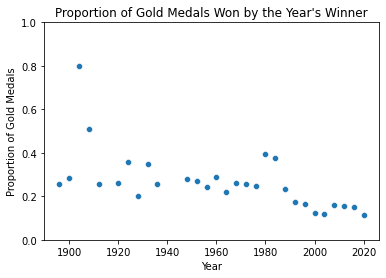

In [98]:
sns.scatterplot(data=df, x="olympic_years", y="winner_proportion_gold")
plt.title("Proportion of Gold Medals Won by the Year's Winner")
plt.ylim(0,1)
plt.ylabel("Proportion of Gold Medals")
plt.xlabel("Year")

How many of the gold medals does the winning country need to win to win the olympics?

In [99]:
df["second_proportion_gold"] = df["second_country_gold"]/df["num_events"]

In [100]:
df_temp = df[["olympic_years","winner_proportion_gold", "second_proportion_gold"]]

In [101]:
df_temp_melt = pd.melt(df_temp, id_vars=["olympic_years"], value_vars=["winner_proportion_gold", "second_proportion_gold"])

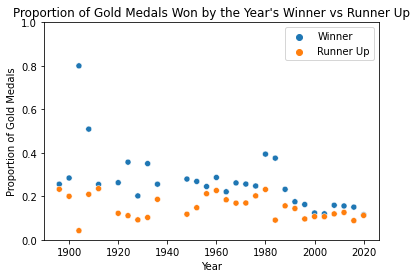

In [102]:
sns.scatterplot(data=df_temp_melt, x="olympic_years", y="value", hue="variable")
plt.title("Proportion of Gold Medals Won by the Year's Winner vs Runner Up")
plt.ylim(0,1)
plt.ylabel("Proportion of Gold Medals")
plt.xlabel("Year")
L = plt.legend()
L.get_texts()[0].set_text("Winner")
L.get_texts()[1].set_text("Runner Up")

In [103]:
(df["winner_proportion_gold"] - df["second_proportion_gold"]).mean()

0.11805378864791448

In [104]:
(df["winner_proportion_gold"] - df["second_proportion_gold"]).median()

0.06976744186046513

What was the largest margin of victory? Smallest? (In terms of # of gold medals won)

In [105]:
(df["winner_proportion_gold"] - df["second_proportion_gold"]).sort_values(ascending=False)

2     0.757895
3     0.300000
19    0.285068
8     0.247863
6     0.246032
18    0.162562
10    0.161765
5     0.141026
11    0.120805
7     0.110092
15    0.093023
16    0.087179
1     0.084211
20    0.075949
9     0.069767
22    0.066421
27    0.062092
13    0.060000
17    0.045455
25    0.039735
14    0.036810
12    0.033113
21    0.031128
26    0.029801
0     0.023256
4     0.019608
23    0.016667
24    0.013289
28    0.002950
dtype: float64

In [106]:
(df["winning_country_gold"] - df["second_country_gold"]).sort_values(ascending=False)

2     72
19    63
3     33
18    33
6     31
8     29
5     22
10    22
27    19
20    18
22    18
11    18
16    17
15    16
7     12
25    12
13     9
26     9
17     9
9      9
1      8
21     8
14     6
12     5
23     5
24     4
4      2
0      1
28     1
dtype: int64

How far is the gap between 1st 2nd 3rd placed countries on average?

What proportion of the gold medals do the top 3 countries win?

In [107]:
df["third_proportion_gold"] = df["third_country_gold"]/df["num_events"]

In [108]:
df["other_proportion_gold"] = (df["num_events"]-df["winning_country_gold"]-df["second_country_gold"]-df["third_country_gold"])/df["num_events"]

<Figure size 720x720 with 0 Axes>

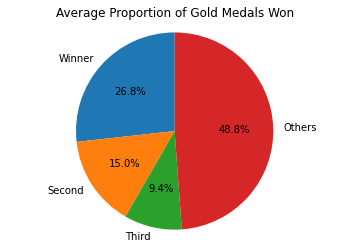

In [109]:
plt.figure(figsize=(10, 10))

labels = ["Winner", "Second", "Third", "Others"]
winner = df.winner_proportion_gold.mean()
second = df.second_proportion_gold.mean()
third = df.third_proportion_gold.mean()
other = df.other_proportion_gold.mean()
sizes = [winner, second, third, other]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.title("Average Proportion of Gold Medals Won")

plt.show()

<Figure size 720x720 with 0 Axes>

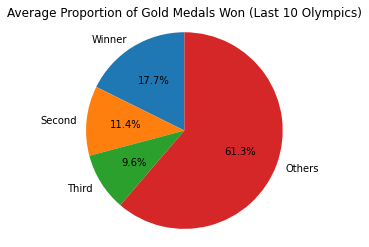

In [121]:
plt.figure(figsize=(10, 10))

df_temp = df.tail(10)

labels = ["Winner", "Second", "Third", "Others"]
winner = df_temp.winner_proportion_gold.mean()
second = df_temp.second_proportion_gold.mean()
third = df_temp.third_proportion_gold.mean()
other = df_temp.other_proportion_gold.mean()
sizes = [winner, second, third, other]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.title("Average Proportion of Gold Medals Won (Last 10 Olympics)")

plt.show()

/Users/RyanWong/Documents/summer-olympics-viz/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/RyanWong/Documents/summer-olympics-viz/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/RyanWong/Documents/summer-olympics-viz/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

<Figure size 720x720 with 0 Axes>

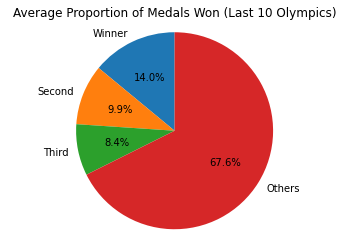

In [126]:
plt.figure(figsize=(10, 10))

df_temp = df.tail(10)

df_temp["winner_proportion_medals"] = (df_temp["winning_country_gold"] + df_temp["winning_country_silver"] 
+ df_temp["winning_country_bronze"])/df_temp["total_medals"]
df_temp["second_proportion_medals"] = (df_temp["second_country_gold"] + df_temp["second_country_silver"] 
+ df_temp["second_country_bronze"])/df_temp["total_medals"]
df_temp["third_proportion_medals"] = (df_temp["third_country_gold"] + df_temp["third_country_silver"] 
+ df_temp["third_country_bronze"])/df_temp["total_medals"]
df_temp["other_proportion_medals"] = 1 - df_temp["winner_proportion_medals"] - df_temp["second_proportion_medals"] - df_temp["third_proportion_medals"]

labels = ["Winner", "Second", "Third", "Others"]
winner = df_temp.winner_proportion_medals.mean()
second = df_temp.second_proportion_medals.mean()
third = df_temp.third_proportion_medals.mean()
other = df_temp.other_proportion_medals.mean()
sizes = [winner, second, third, other]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.title("Average Proportion of Medals Won (Last 10 Olympics)")

plt.show()

Most medals won but still came in second

Host City Performance

In [114]:
year = 2016
jquery_tablesorter_indicator = True
html_text = requests.get(f"https://en.wikipedia.org/wiki/{str(year)}_Summer_Olympics_medal_table")
soup = BeautifulSoup(html_text.text, 'lxml')
tables = soup.find_all('table', class_="wikitable sortable plainrowheaders jquery-tablesorter")
if not tables:
    tables = soup.find_all('table', class_="wikitable sortable plainrowheaders")
    jquery_tablesorter_indicator = False

if len(tables) > 1:
    tables = tables[0]

for table in tables:
    print(table.prettify())
    rows = table.find_all('tr')
    row_count = -1

    for row in rows:
        row_count = row_count + 1
        if row_count == 0:
            continue
            
        header = row.find_all('th') #host city has a differen color backgrouind
        
        
        if row_count <= 3:
            cells = row.find_all('td')
            count = -1

            for cell in cells:
                count = count+1
                print(cell.style)
                
                if cell.style == "background-color:#ccccff;text-align:left":
                    print(cell.text)

<table class="wikitable sortable plainrowheaders jquery-tablesorter" style="text-align:center">
 <caption>
  2016 Summer Olympics medal table
 </caption>
 <tbody>
  <tr>
   <th scope="col">
    Rank
   </th>
   <th scope="col">
    NOC
   </th>
   <th class="headerSort" scope="col" style="width:4em;background-color:gold">
    Gold
   </th>
   <th class="headerSort" scope="col" style="width:4em;background-color:silver">
    Silver
   </th>
   <th class="headerSort" scope="col" style="width:4em;background-color:#c96">
    Bronze
   </th>
   <th scope="col" style="width:4em">
    Total
   </th>
  </tr>
  <tr>
   <td>
    1
   </td>
   <th scope="row" style="background-color:#f8f9fa;text-align:left">
    <img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/22px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_o